#Import packages and import data to dataframe


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# requests for getting data file from Google Sheet link
import requests
# get latest Vietnam SARS-CoV-2 | COVID-19 data
import io
from io import BytesIO


# get data from shared Google Sheet
response = requests.get('https://docs.google.com/spreadsheets/u/1/d/1vkvCEkZ8txrTmEldQGAycVVQbBHV-BwqTaCrxNYTtug/export?format=csv&id=1vkvCEkZ8txrTmEldQGAycVVQbBHV-BwqTaCrxNYTtug&gid=453484829')
assert response.status_code == 200, 'Wrong status code'
data = response.content

# import data to dataframe
df = pd.read_csv(BytesIO(data), usecols=['Age']) #unprocessed data

# view first 10 data rows
df.head(10)

,Age
0,66
1,28
2,25
3,29
4,23
5,25
6,73
7,29
8,30
9,42


#Age Cluster

In [7]:
#get no. of rows in df
nrow,_ = df.shape 
#print(nrow)
for i in range(0, nrow):
    age= df.iloc[i,0]
    if (age<=14):
        df.at[i,'AgeClustering'] = "Children"
        #print("Child")
    elif((age>14) and (age<=24)):
        df.at[i,'AgeClustering'] = "Early Working Age"
        #print("Early Working Age")
    elif ((age>25) and (age<=54)):
        df.at[i,'AgeClustering'] = "Prime Working Age"
        #print("Prime Working Age")
    elif ((age>55)and(age<=64)):
        df.at[i,'AgeClustering'] = "Mature Working Age"
        #print("Mature Working Age")
    else:
       df.at[i,'AgeClustering'] = "Elderly"
      #print('Elderly')
print(df)

     Age      AgeClustering
0     66            Elderly
1     28  Prime Working Age
2     25            Elderly
3     29  Prime Working Age
4     23  Early Working Age
..   ...                ...
323   18  Early Working Age
324   34  Prime Working Age
325   20  Early Working Age
326   31  Prime Working Age
327    1           Children

[328 rows x 2 columns]


In [8]:
dfi=df['AgeClustering'].value_counts()
print(dfi)
dfi.shape

Prime Working Age     178
Early Working Age      77
Elderly                36
Mature Working Age     27
Children               10
Name: AgeClustering, dtype: int64


(5,)

In [9]:
value = dfi.to_numpy()

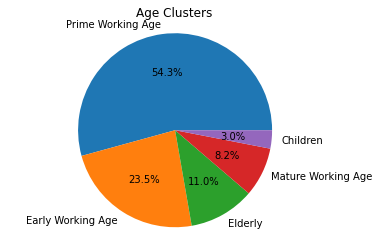

In [10]:
# visualize data in pie chart using plt
my_data = value;
my_labels = 'Prime Working Age','Early Working Age','Elderly','Mature Working Age','Children'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Age Clusters')
plt.axis('equal')
plt.show()